In [1]:
!python SCM_discretemisspec.py

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
KSD :  tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0028, 0.0214, 0.0205,  ..., 0.0604, 0.0085, 0.0342],
         [0.0007, 0.0218, 0.0216,  ..., 0.0631, 0.0145, 0.0347],
         [0.0006, 0.0194, 0.0213,  ..., 0.0624, 0.0084, 0.0328],
         ...,
         [0.0013, 0.0160, 0.0221,  ..., 0.0629, 0.0112, 0.0312],
         [0.0015, 0.017

In [2]:
import pickle
import matplotlib.pyplot as plt
with open("results_Rademachermispec.pkl", "rb") as f:
    data = pickle.load(f)

In [3]:
ksd = data['KSD']
means = data['Mean']

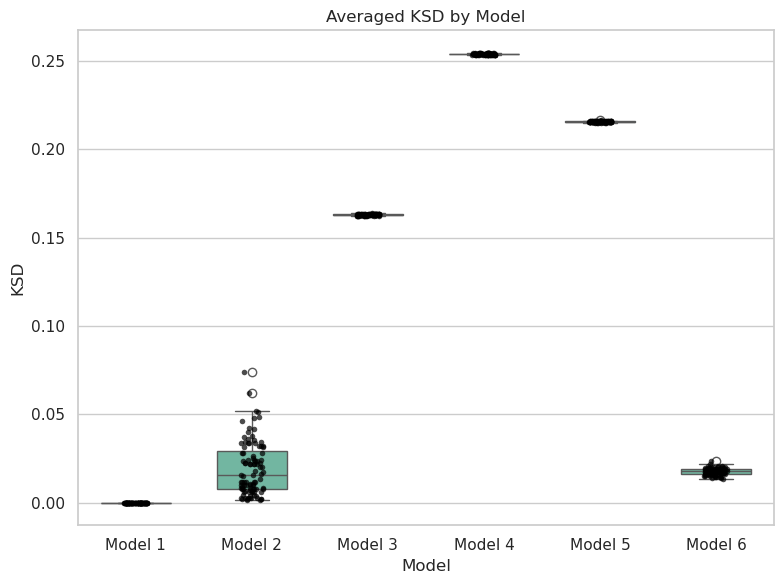

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suppose ksd is a NumPy array of shape (n_models, n_levels, n_trials)
ksd_avg = np.mean(ksd.numpy(), axis=1)  # shape becomes (models, trials)

# For demonstration, let's create some fake data:
n_models, n_levels, n_trials = 6, 50, 100

# Convert to a long-form DataFrame for seaborn plotting
Data = []
for model in range(n_models):
    for trial in range(n_trials):
        Data.append({'Model': f'Model {model+1}', 'KSD': ksd_avg[model, trial]})
df = pd.DataFrame(Data)

# Set a nice style
sns.set(style="whitegrid", palette="Set2")

plt.figure(figsize=(8, 6))
# Create the boxplot
sns.boxplot(x="Model", y="KSD", data=df, width=0.6)
# Overlay the individual data points
sns.stripplot(x="Model", y="KSD", data=df, color="black", size=4, jitter=True, alpha=0.7)
plt.title("Averaged KSD by Model")
plt.tight_layout()
plt.show()